# Optimizers for Neural Networks

We can optimize our gradient descent update with a number of different *optimizers*

## Regularization

- **Deep Neural Network:** is a neural network with two or more hidden layers between the inputs and outputs, adding complexity however may overfit to our training data



- **Regularization:** is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error, i.e. prevent overfitting
    - **Regularization penalty in cost function:** similar to LASSO or Ridge regression where more and higher weights will be penalized within our actual cost function
    - **Dropout:** where we will lose certain neurons in our network to ensure no model is over reliant on any particular neuron or any particular path
    - **Early Stopping:** stopping gradient descent short so that it is not perfectly fit to the training set 
    - **Stochastic / Mini-Batch Gradient Descent:** may ensure that we do not perfectly fit our training set

### a. Penalized Cost Function

$$ J = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^m W_i^2 $$

We can explicitly add a penalty to the loss function for having higher weights

### b. Dropout

- Dropout is a mechanism where at each training iteration (batch) we randomly remove a subset of neurons



- This prevents the NN from relying too much on individual pathways (instead, having enough learning done on other pathways through other nodes) making it more robust



- At test time we *rescale* the weight of the neuron to reflect the percentage of the time it was active


<div>
    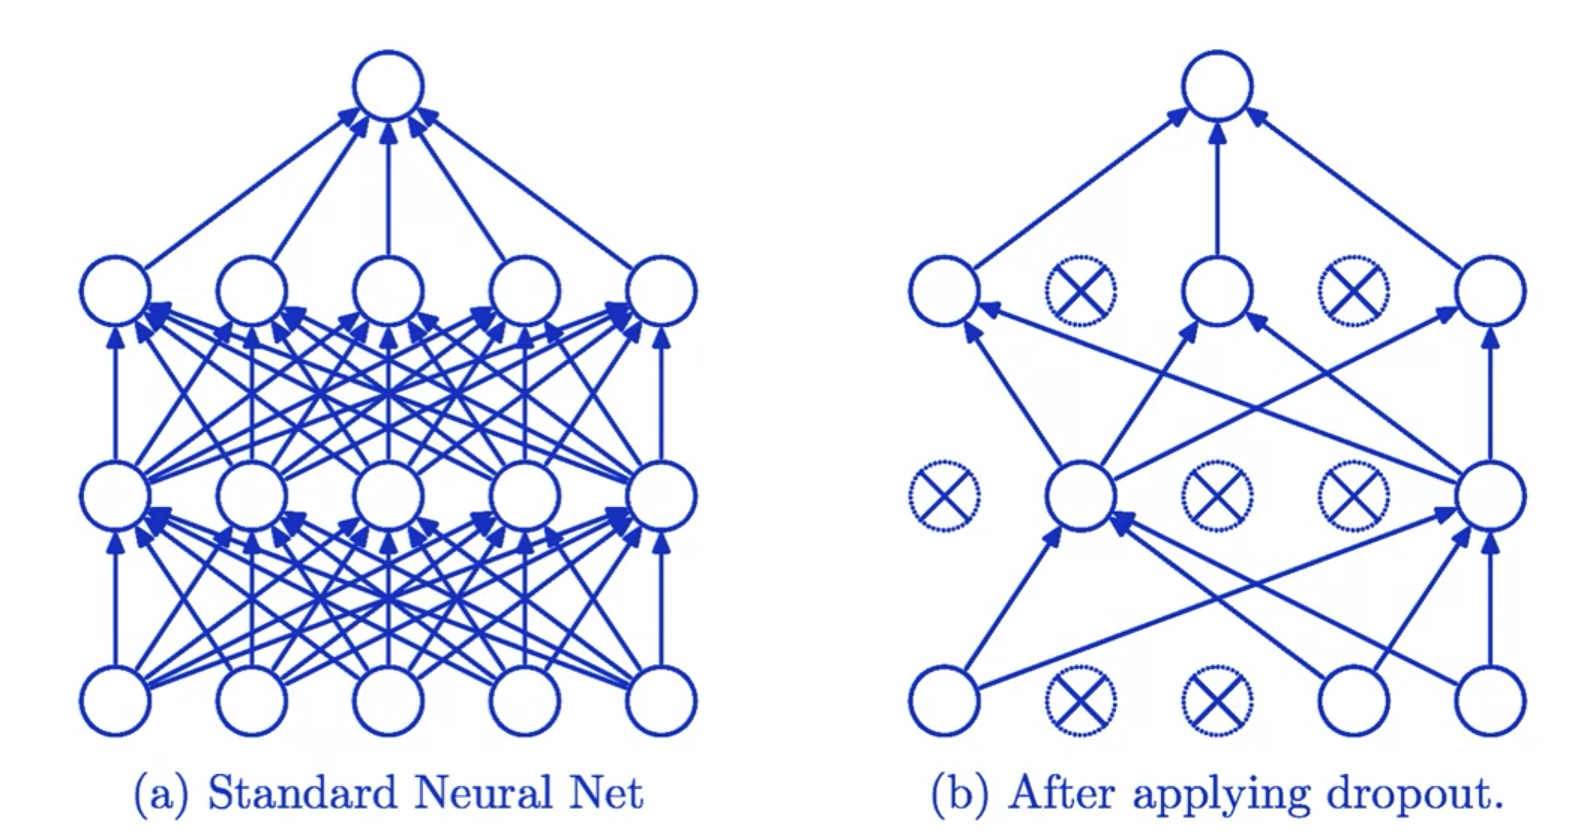
<div />

If the neuron was presenty with probability $p$, at test time we scale the outbound weights by a factor of $p$

<div>
    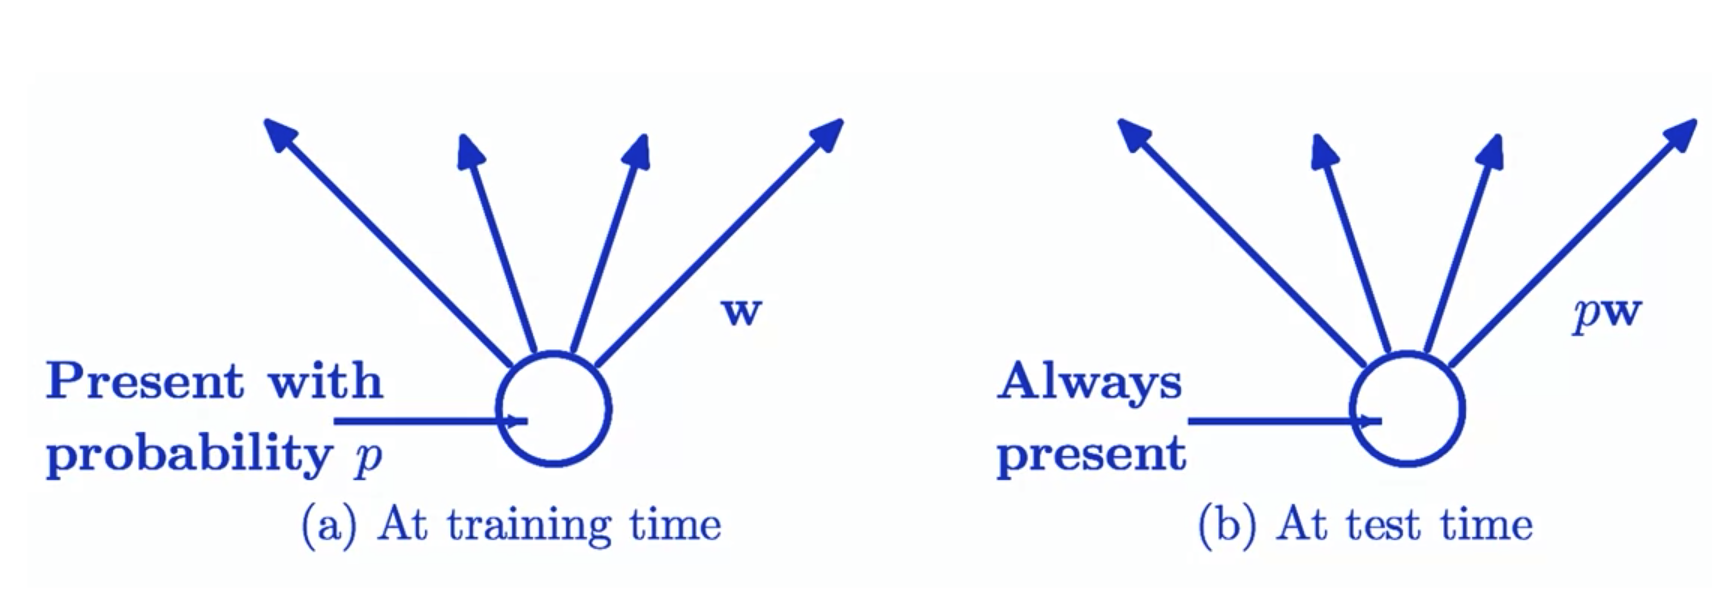
<div />

## Standard Update Formula for Gradient Descent

$$ W = W - \alpha \nabla J $$

To find the optimal weights

## 1. Momentum

With the regular gradient descent, we will generally move slowly towards our optimum (only change direction by a little but each time) and we can be changing direction fairly frequently.

**Momentum** smooths out this process by taking somewhat of a **running average** of each of the step directions, therefore, smoothing out that variation of each of the individual steps for regular gradient descent.

Rather than just updating our formula, we also look back at prior values to smooth out these steps:

$$ \nu_t =  \eta \nu_{t-1} - \alpha \nabla J $$


$$ W = W - \nu_t $$

Where,

$\eta$ is referred to as the **Momentum** hyperparameter and the larger the value is the more we are going to be smoothing out our values.

The more we are incorporating **past values** into our running average.

We will be giving values **less than 1** in general, with common value chose being $0.9$

### Regular Gradient Descent

<div>
    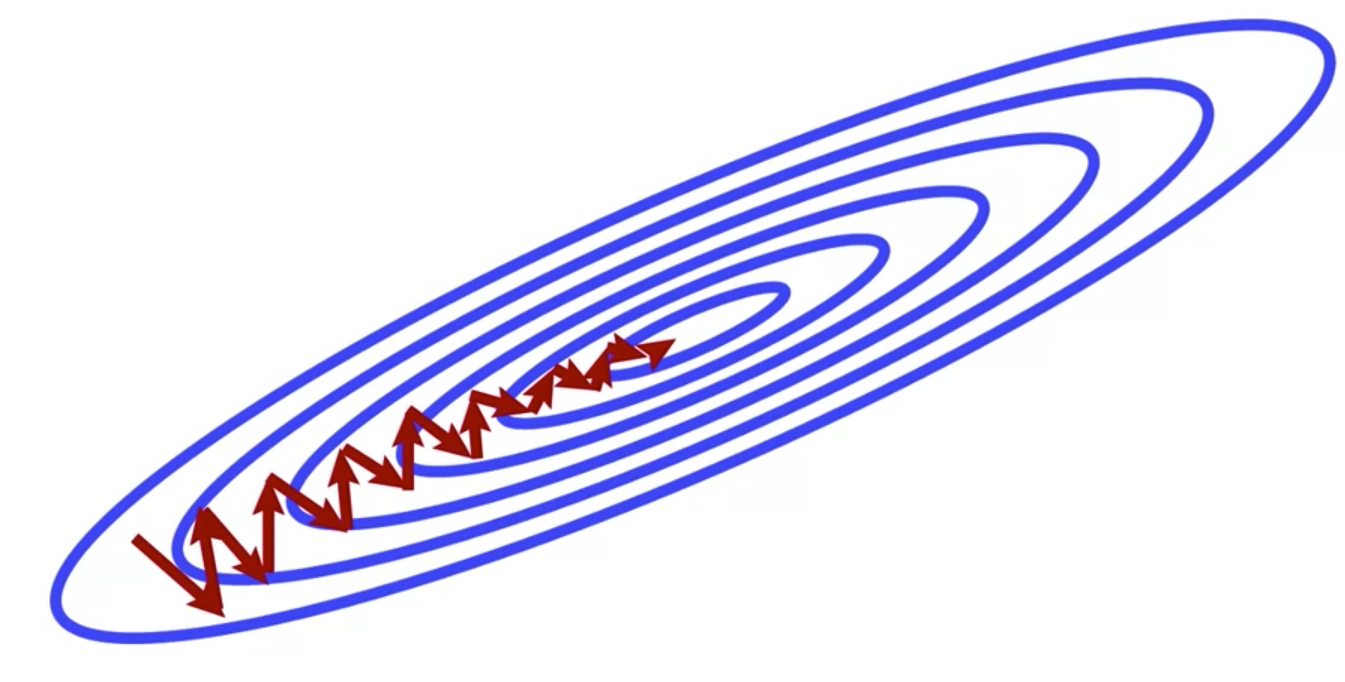
<div />

We take small steps that can fluctuate quite often.

### Gradient Descent with Momentum

<div>
    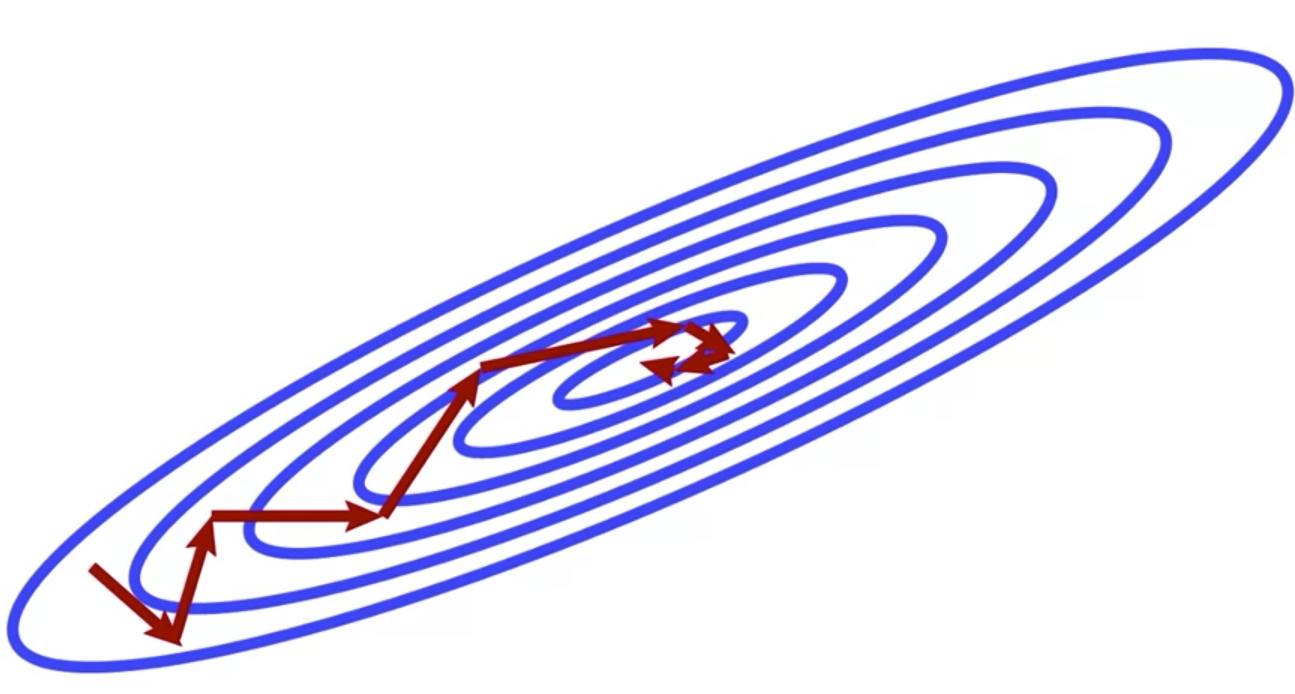
<div />

The fluctuations are not going to be as dramatic, and will be smoothed out, and the steps can get much larger as momentum is gained.

**N.B.** Momentum can cause us to **overshoot** the optimum value, however, the momentum will shrink at this point and we should be able to come back to the optimal value

## 2. Nesterov Momentum

The idea here is to control *overshooting* by looking one-step ahead.

We apply gradient only to the *non-momentum* component, given that the momentum vector will be pointing, generally speaking, in the right direction, so we will be a bit more accurate using the gradient with a momentum accounted for than the gradient at that original position

$$ \nu_t =  \eta \nu_{t-1} - \alpha \nabla (J - \eta \nu_{t-1}) $$


$$ W = W - \nu_t $$

Using the gradient with correction we can get that extra step in the right direction

<div>
    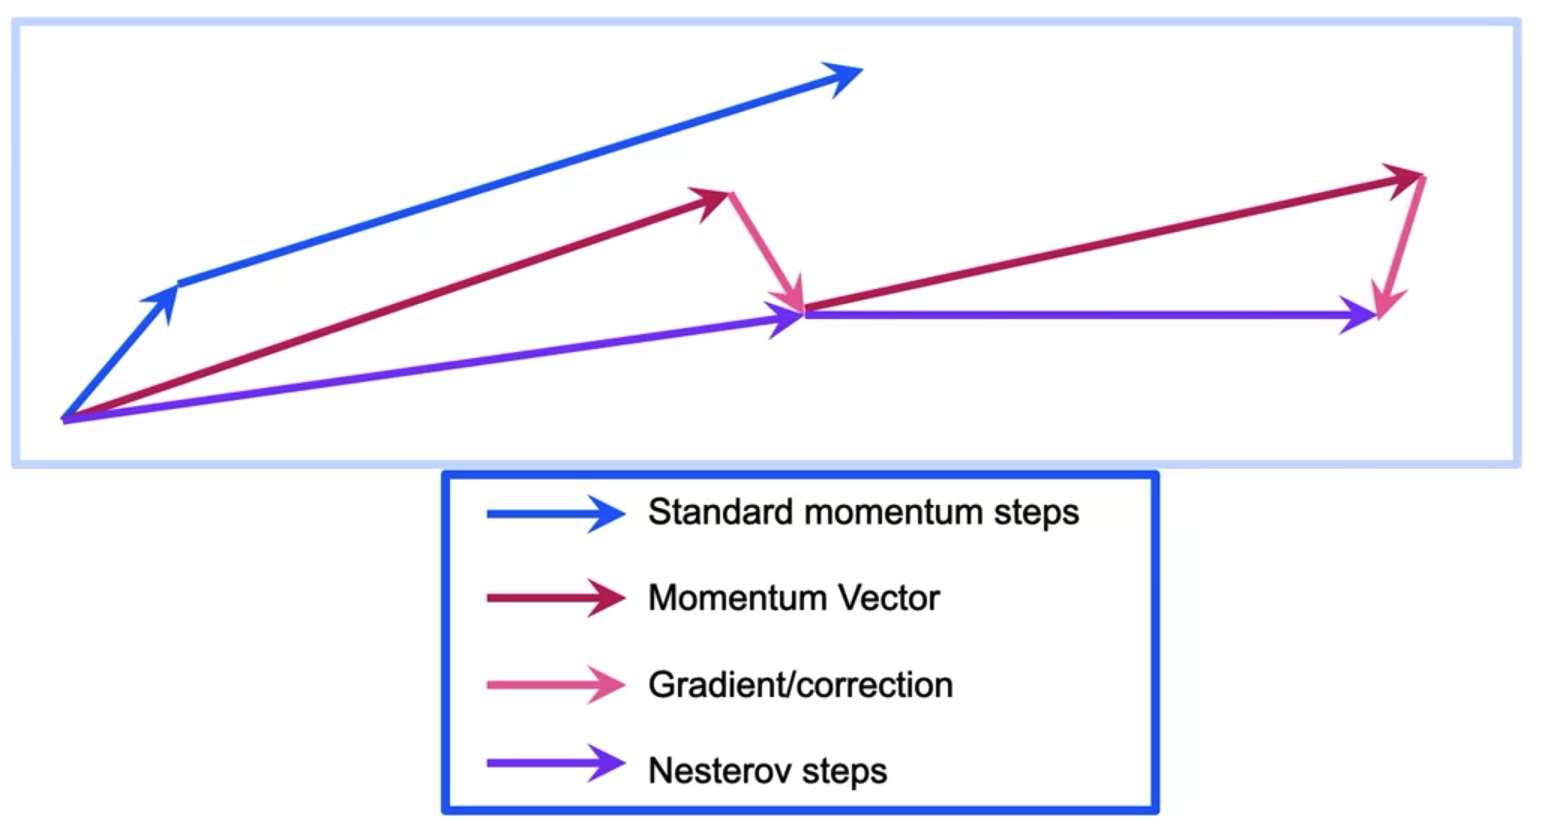
<div />

## 3. AdaGrad (Adaptive Gradient Algorithm)

The idea is to scale the update for each weight separately, as we do our gradient descent and we update our weights.

- 1. Update frequently-updated wights **less**


- 2. Keep running the sum of previous updates (while updating)


- 3. Any new update will be scaled down by a factor (divided by) of the previous sum so that the steps continuously decrease

Staring point: $G_i(0) = 0$

This term $G$ will continue to increase as we will be starting at zero and will keep on adding the squares of a derivative as follows:

$$ G_i(t) = G_i(t-1) + \big(\frac{\partial{L}}{\partial w_i}(t)\big)^2 $$

G will continue to increase (given we are taking the square)

Then we use the learning rate divided by the square root of $G$ and given $G$ is continously increasing, we know that the learning rate will **continuosly decrease** and this will lead to smaller and smaller updates at each iteration.

$$ W = W - \frac{\eta}{\sqrt{G_t} + \epsilon} \nabla J $$

As we get closer and closer to the optimal value, the learning rate will shrink and will **help us avoid overshooting**

## 4. RMSProps

Similar to the AdaGrad, howeverm instead of using the sum of previous gradients, we are going to be **decaying older gradients and giving more weight to more recent gradients**

This can be similar to the functionality that we use for momentum, but we are using this new weighting except for the learning rates

This will allow for updates to be more **adaptive to more recent gradients** and this is generally more efficient tha using the AdaGrad.

## 5. Adam (Adaptive Moment Estimation)

We use both **first order** and **second order** information and decay both over time, i.e. will combine both the concepts for momentum and the RMSProp

$\beta_1 = 0.9, \beta_2 =0.999$ usually by default

#### a) 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla J$$

Correct for bias by using: (used more in the beginning, as t is growing, the larger t is, the smaller $\beta_t$ is and it will continue to shrink as t grows

$$ \hat{m_t} \frac{m_t}{1- \beta_1^t} $$

#### b)

$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) \nabla J $$

Correct for bias by using:

$$ \hat{v_t} = \frac{v_t}{1-\beta_1^t}$$


#### c) Update 

We update our weights using our special learning rate, scaled for $v_t$ multiplied by our momentum term

$$ W = W - \frac{\eta}{\sqrt{\hat{v_t}} + \epsilon}  \hat{m_t} $$